# Problem statement

**Exploring the connections of ingredients in Indonesian dishes.**

1. What are the key ingredients/components of Indonesian dishes?

2. What are the groups of ingredients that work well together (used in numerous dishes together)?

## Data Preperation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The raw dataset is retrieved from the Wikidata query service, for all instances of Food with the country of origin as Indonesia.

In [2]:
df_raw = pd.read_csv("C:/Users/anish/Desktop/Github/network_analysis/query3.csv", index_col=None, header=0)

In [3]:
df_raw.head()

,food,foodLabel,mother,motherLabel,father,fatherLabel,label_clean,label_temp,category
0,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q11002,sugar,NaN,NaN,sugar,NaN,spice
1,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q841779,coconut milk,NaN,NaN,coconut milk,NaN,fruits
2,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q1269205,rice flour,NaN,NaN,rice flour,NaN,flour
3,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q2249305,wheat flour,NaN,NaN,wheat flour,NaN,flour
4,http://www.wikidata.org/entity/Q100529246,punten,http://www.wikidata.org/entity/Q11254,salt,NaN,NaN,salt,NaN,spice


# Data Cleaning

change the column names

In [4]:
df = pd.DataFrame()
df['food'] = df_raw['food']
df['food_name'] =df_raw['foodLabel']
df['ingredient_id '] = df_raw['mother']
df['ingredient_name '] = df_raw['label_clean']
df['origin_id'] = df_raw['father']
df['origin_name'] = df_raw['fatherLabel']
df['ingredient_category'] = df_raw['category']
df


,food,food_name,ingredient_id,ingredient_name,origin_id,origin_name,ingredient_category
0,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q11002,sugar,NaN,NaN,spice
1,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q841779,coconut milk,NaN,NaN,fruits
2,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q1269205,rice flour,NaN,NaN,flour
3,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q2249305,wheat flour,NaN,NaN,flour
4,http://www.wikidata.org/entity/Q100529246,punten,http://www.wikidata.org/entity/Q11254,salt,NaN,NaN,spice
...,...,...,...,...,...,...,...
2336,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q10377,Majalengka,NaN
2337,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q10395,Cirebon,NaN
2338,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q10981,Wonogiri,NaN
2339,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q11013,Wonosobo,NaN


In [5]:
import sqlite3 as sl

Here the data will be stored in the my-test.db file locally.

In [6]:
con = sl.connect('test_db.db')

In [7]:
with con:
    con.execute("""
        CREATE TABLE IF NOT EXISTS FOOD_INGREDIENT (
         food TEXT NOT NULL,
         food_name TEXT,
         ingredient_id TEXT,
         ingredient_name TEXT,
         origin_id TEXT,
         origin_name TEXT,
         ingredient_category TEXT
        );
    """)

In [8]:
data = df.values.tolist()

In [9]:
sql = 'INSERT INTO FOOD_INGREDIENT (food, food_name, ingredient_id, ingredient_name, origin_id, origin_name, ingredient_category) values(?, ?, ?, ?, ?, ?, ?)'

In [10]:
with con:
    con.executemany(sql,data)

In [11]:
with con:
    data = con.execute("SELECT * FROM FOOD_INGREDIENT WHERE food_name = 'cenil'")
    for row in data:
        print(row)

('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q11002', 'sugar', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'spice')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q11254', 'salt', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'spice')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q177998', 'agar', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'carb')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q753009', 'food coloring', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'misc')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q841779', 'coconut milk', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'fruits')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q3342808', 'coconut', 'http://www.wikidata.org/entity/

Normalize similar item names like [mineral water, drinking water, and water] to be under one single name as they’re referring to the same item.

In [12]:
df = pd.read_sql_query("SELECT food_name, group_concat(replace(ingredient_name,' ','_'),' ') as ingredient_list from (select distinct food_name, ingredient_name from FOOD_INGREDIENT) group by 1", con)
df = df.dropna()
df

,food_name,ingredient_list
1,Adon-Adon Coro,ginger spice coconut_milk palm_sugar
2,Angsle,glutinous_rice coconut_milk
6,Ayam panggang Bangka,chicken
7,Babi Panggang Karo,pork_meat
8,Babungku,salt coconut_milk rice_flour banana_leaf brown...
...,...,...
408,tiwul,cassava
409,tumpeng,rice egg tempeh
411,urap,white_cabbage spinach asparagus bean_sprout co...
414,wingko,margarine sugar salt coconut glutinous_rice_flour


In [13]:
df[df['food_name'] == 'cenil']

,food_name,ingredient_list
264,cenil,sugar salt agar food_coloring coconut_milk coc...


# Transform the data

Key things to be identified for Network Analysis modeling: (1) the entity, (2) the connection between entities, (3) the graph type, and (4) the properties of the connection (if any).

In [14]:
total_ingredient = pd.read_sql_query("SELECT ingredient_name, ingredient_category, count(distinct food_name) from FOOD_INGREDIENT where ingredient_name is not null group by 1,2 order by 3 desc", con)
total_ingredient

,ingredient_name,ingredient_category,count(distinct food_name)
0,coconut milk,fruits,63
1,salt,spice,59
2,sugar,spice,44
3,garlic,spice,35
4,palm sugar,seasoning,34
...,...,...,...
187,turnip,spice,1
188,vegetable,vegetables,1
189,walnut,nuts,1
190,white cabbage,vegetables,1


# Create Ingredient Connection

In [15]:
# Create a sublist of lower case words for each tweet
ingredient_in_list = [ingredient.split() for ingredient in df.ingredient_list]
ingredient_in_list

[['ginger', 'spice', 'coconut_milk', 'palm_sugar'],
 ['glutinous_rice', 'coconut_milk'],
 ['chicken'],
 ['pork_meat'],
 ['salt', 'coconut_milk', 'rice_flour', 'banana_leaf', 'brown_sugar'],
 ['brown_sugar', 'ginger'],
 ['sugar', 'salt', 'wheat_flour'],
 ['sugar', 'glutinous_rice'],
 ['potato', 'sugar', 'coconut_milk', 'glutinous_rice_flour'],
 ['eggplant', 'asparagus'],
 ['glutinous_rice'],
 ['sago'],
 ['banana',
  'sugar',
  'glutinous_rice',
  'mungbean',
  'coconut_milk',
  'rice_flour'],
 ['water', 'glutinous_rice', 'coconut_milk', 'palm_sugar'],
 ['sago'],
 ['seaweed'],
 ['fish', 'coconut_milk', 'tapioca_flour'],
 ['tapioca', 'wheat_flour'],
 ['salt', 'mineral_water', 'msg', 'vegetable_oil', 'egg', 'sago_flour'],
 ['glutinous_rice', 'palm_sugar', 'coconut'],
 ['lemongrass', 'beef', 'breadnut', 'scallion', 'peanut', 'innards'],
 ['meat', 'beef'],
 ['sugar', 'Grass_jelly', 'coconut_milk', 'Cendol', 'palm_sugar', 'Tapai'],
 ['milk', 'cracker', 'Tapai'],
 ['salt', 'palm_sugar', 'cocon

In [16]:
import nltk
from nltk import bigrams

#Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in ingredient_in_list]

terms_bigram[0]

[('ginger', 'spice'),
 ('spice', 'coconut_milk'),
 ('coconut_milk', 'palm_sugar')]

In [17]:
import itertools
import collections

#Flatten list of bigrams in clean tweets
bigrams =  list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('sugar', 'salt'), 22),
 (('coconut_milk', 'rice_flour'), 13),
 (('glutinous_rice', 'coconut_milk'), 7),
 (('rice_flour', 'wheat_flour'), 7),
 (('pandan', 'coconut_milk'), 7),
 (('coconut_milk', 'palm_sugar'), 6),
 (('salt', 'coconut_milk'), 6),
 (('sugar', 'coconut_milk'), 6),
 (('palm_sugar', 'coconut'), 6),
 (('palm_sugar', 'cassava'), 6),
 (('salt', 'chili'), 5),
 (('salt', 'garlic'), 5),
 (('rice_flour', 'coconut'), 5),
 (('water', 'salt'), 5),
 (('sugar', 'glutinous_rice'), 4),
 (('coconut_milk', 'glutinous_rice_flour'), 4),
 (('coconut', 'glutinous_rice_flour'), 4),
 (('onion', 'garlic'), 4),
 (('flour', 'egg'), 4),
 (('egg', 'coconut_milk'), 4)]

In [18]:
df.ingredient_list

1                   ginger spice coconut_milk palm_sugar
2                            glutinous_rice coconut_milk
6                                                chicken
7                                              pork_meat
8      salt coconut_milk rice_flour banana_leaf brown...
                             ...                        
408                                              cassava
409                                      rice egg tempeh
411    white_cabbage spinach asparagus bean_sprout co...
414    margarine sugar salt coconut glutinous_rice_flour
415                     water sugar glutinous_rice_flour
Name: ingredient_list, Length: 236, dtype: object

In [19]:
from collections import defaultdict

def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        #preprocessing 
        text = text.lower().split()
        # iterate over ingredient list 
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t,token]))
                d[key] += 1
        

    #formulate the dictionary into dataframe
    vocab = sorted(vocab)
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype = np.int16),
                      index =  vocab,
                      columns = vocab)
    for key, value in d.items():
        df.at[key[0],key[1]] = value
        df.at[key[1],key[0]] = value
    return df
                      

In [20]:
df_test = co_occurrence(df.ingredient_list, 2)
df_test

,agar,amaranth,ambarella,anchovy,arrow_loach,asam,asparagus,baking_powder,bamboo,bamboo_shoots,...,vanilla,vegetable,vegetable_oil,vinegar,walnut,water,wheat_flour,white_cabbage,yeast,yolk
agar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amaranth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambarella,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anchovy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arrow_loach,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wheat_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4,1
white_cabbage,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,1


In [21]:
df_temp = df_test.head(20)
df_temp

,agar,amaranth,ambarella,anchovy,arrow_loach,asam,asparagus,baking_powder,bamboo,bamboo_shoots,...,vanilla,vegetable,vegetable_oil,vinegar,walnut,water,wheat_flour,white_cabbage,yeast,yolk
agar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amaranth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambarella,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anchovy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arrow_loach,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asparagus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
baking_powder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bamboo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bamboo_shoots,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
columns = list(df_temp)
columns

['agar',
 'amaranth',
 'ambarella',
 'anchovy',
 'arrow_loach',
 'asam',
 'asparagus',
 'baking_powder',
 'bamboo',
 'bamboo_shoots',
 'banana',
 'banana_leaf',
 'basil',
 'bay_leaf',
 'bean_sprout',
 'beef',
 'beet',
 'bell_fruit',
 'bilimbi',
 'black-eyed_pea',
 'blackpepper',
 'bottlegourd',
 'bread',
 'breadnut',
 'broth',
 'brown_sugar',
 'butter',
 'cabbage',
 'candlenut',
 'cardamom',
 'carrot',
 'cassava',
 'cassava_flour',
 'cattle',
 'cauliflower',
 'celery',
 'cendol',
 'chicken',
 'chicken_fingers',
 'chicken_stock',
 'chili',
 'chives',
 'chocolate_powder',
 'cinnamon',
 'clam',
 'coconut',
 'coconut_cream',
 'coconut_milk',
 'coconut_oil',
 'coffee_bean',
 'condiment',
 'cooking_oil',
 'coriander',
 'corn',
 "cow's_trotters",
 'cowhide',
 'cracker',
 'cucumber',
 'dried_shrimp',
 'drinking_water',
 'duck_meat',
 'egg',
 'egg_white',
 'eggplant',
 'emping',
 'fish',
 'flavour_enhancer',
 'flour',
 'food_coloring',
 'fried_onion',
 'galangal',
 'garlic',
 'ghost_pepper',
 '

Removing duplicate connections

In [23]:
df_compiled = pd.DataFrame(columns = ['bigram','count'])

for i,row in df_test.iterrows():
    for j in columns:
        if row[j] > 0:
            bigram_name = (i,j)
            reverse_bigram_name = (j,i)
            bigram_value = row[j]
            df_t = pd.DataFrame(columns = ('bigram','count'))
            df_t.loc[-1] = [bigram_name,bigram_value]
            if df_compiled[df_compiled['bigram'] == reverse_bigram_name].empty == False:
                print('dup')
            else:
                df_compiled = df_compiled.append(df_t,ignore_index=True)
                
                

dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup


In [24]:
df_compiled

,bigram,count
0,"(agar, coconut_milk)",1
1,"(agar, food_coloring)",1
2,"(agar, salt)",1
3,"(agar, sugar)",1
4,"(amaranth, basil)",1
...,...,...
830,"(tilia_leaf, turmeric)",2
831,"(vegetable_oil, wheat_flour)",1
832,"(wheat_flour, yeast)",4
833,"(wheat_flour, yolk)",1


In [26]:
df_compiled = df_compiled.sort_values(by=['count'], ascending = False)
df_compiled

,bigram,count
778,"(salt, sugar)",22
358,"(coconut_milk, rice_flour)",15
361,"(coconut_milk, salt)",15
366,"(coconut_milk, sugar)",13
335,"(coconut_milk, glutinous_rice)",11
...,...,...
655,"(milk, sugar)",1
635,"(lime, tomato)",1
633,"(lime, shallot)",1
712,"(palm_sugar, sweet_potato)",1


# Create graph

In [27]:
import networkx as nx

In [28]:
#Create a dictionary of edges and their weights
d = df_compiled.head(100).set_index('bigram').T.to_dict('records')
d

[{('salt', 'sugar'): 22,
  ('coconut_milk', 'rice_flour'): 15,
  ('coconut_milk', 'salt'): 15,
  ('coconut_milk', 'sugar'): 13,
  ('coconut_milk', 'glutinous_rice'): 11,
  ('garlic', 'salt'): 8,
  ('coconut_milk', 'palm_sugar'): 8,
  ('rice_flour', 'wheat_flour'): 8,
  ('coconut_milk', 'egg'): 8,
  ('garlic', 'onion'): 8,
  ('egg', 'salt'): 7,
  ('coconut_milk', 'pandan'): 7,
  ('coconut_milk', 'glutinous_rice_flour'): 7,
  ('glutinous_rice', 'sugar'): 7,
  ('salt', 'water'): 7,
  ('coconut_milk', 'wheat_flour'): 7,
  ('rice_flour', 'sugar'): 6,
  ('cassava', 'palm_sugar'): 6,
  ('brown_sugar', 'rice_flour'): 6,
  ('coconut', 'coconut_milk'): 6,
  ('coconut', 'palm_sugar'): 6,
  ('chili', 'salt'): 6,
  ('garlic', 'ginger'): 5,
  ('ginger', 'lemongrass'): 5,
  ('rice_flour', 'salt'): 5,
  ('glutinous_rice_flour', 'salt'): 5,
  ('beef', 'galangal'): 5,
  ('coconut', 'rice_flour'): 5,
  ('egg', 'flour'): 5,
  ('brown_sugar', 'coconut_milk'): 5,
  ('glutinous_rice', 'palm_sugar'): 5,
  ('g

In [29]:
#Create network plot
G = nx.Graph()

#Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0],k[1],weight=(v*10))

In [30]:
G

# All ingredients graph

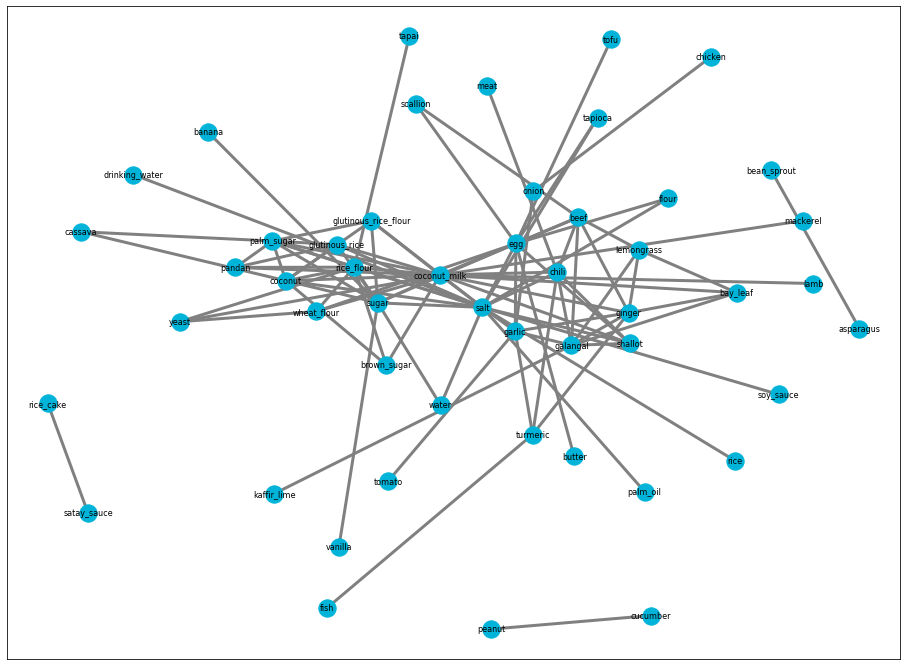

In [31]:
fig,ax = plt.subplots(figsize =(16,12))

pos = nx.spring_layout(G, k=2)

#Plot networks
pos = nx.draw_networkx(G, pos,
                      font_size=8,
                 width=3,
                 edge_color='grey',
                 node_color='#00b4d9',
                 with_labels = True,
                 ax=ax)

plt.show()

In [32]:
weights = nx.get_edge_attributes(G,'weight').values()
weights

dict_values([220, 150, 80, 70, 70, 60, 50, 50, 40, 40, 30, 30, 30, 30, 30, 30, 20, 20, 130, 70, 60, 40, 40, 40, 30, 30, 30, 20, 150, 110, 80, 80, 70, 70, 70, 60, 50, 30, 30, 30, 30, 30, 30, 20, 20, 80, 60, 50, 30, 30, 20, 20, 50, 30, 30, 80, 50, 40, 40, 30, 30, 60, 60, 40, 30, 40, 40, 50, 30, 30, 20, 20, 20, 20, 30, 40, 30, 30, 30, 30, 30, 30, 20, 50, 30, 30, 20, 20, 30, 30, 30, 50, 30, 40, 20, 20, 20, 30, 20, 20])

# Modify graph

In [ ]:
#use node degree as the node size

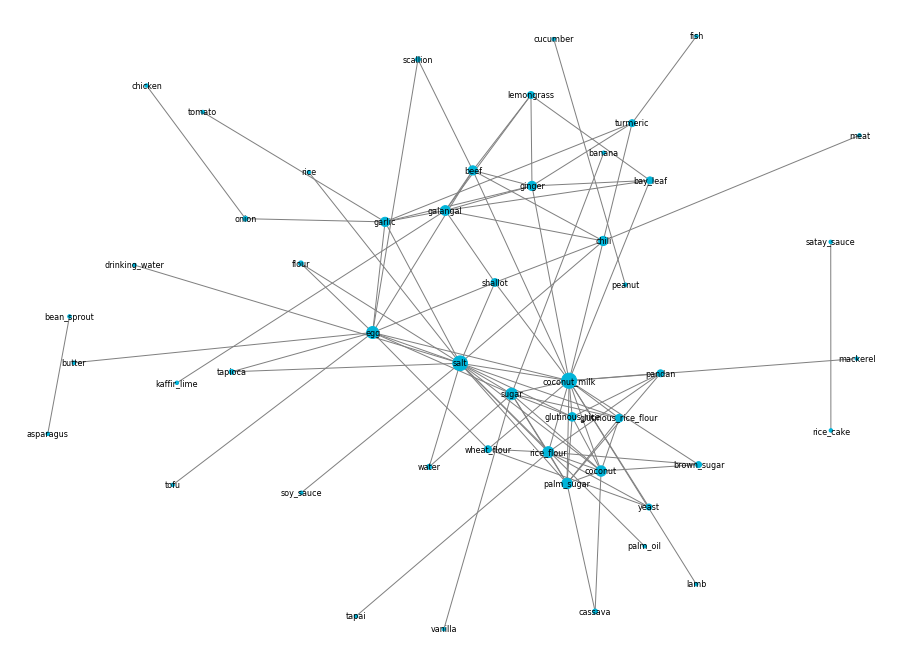

In [33]:
fig,ax = plt.subplots(figsize =(16,12))

pos = nx.spring_layout(G, k=2)

d =dict(G.degree)

nx.draw(G, pos,
        font_size=8,
        width=1,
        edge_color='grey',
        node_color='#00b4d9',
        with_labels = True, 
        nodelist = d.keys(),
       node_size = [v*12 for v in d.values()])

plt.show()

In [34]:
carac = pd.DataFrame()
carac = total_ingredient[['ingredient_name','ingredient_category']]
carac

,ingredient_name,ingredient_category
0,coconut milk,fruits
1,salt,spice
2,sugar,spice
3,garlic,spice
4,palm sugar,seasoning
...,...,...
187,turnip,spice
188,vegetable,vegetables
189,walnut,nuts
190,white cabbage,vegetables


In [36]:
carac.nunique()

ingredient_name        192
ingredient_category     11
dtype: int64

# Analyze the graph

Coconut milk is the item with the highest co-occurrence! Come to think about it, it is widely used in Indonesian dishes.

In [45]:
# Compute the degree centralitites for G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degre centrality: max_dc
max_dc = max(deg_cent.values())

#Find the item(s) that have highest co-occurrence: profile_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

print(prolific_collaborators)

['coconut_milk']


# Subset Cliques

In [46]:
list(nx.find_cliques(G))

[['meat', 'chili'],
 ['bean_sprout', 'asparagus'],
 ['drinking_water', 'salt'],
 ['peanut', 'cucumber'],
 ['water', 'sugar', 'salt'],
 ['turmeric', 'ginger', 'garlic'],
 ['turmeric', 'fish'],
 ['turmeric', 'chili'],
 ['chicken', 'onion'],
 ['coconut_milk', 'ginger', 'bay_leaf'],
 ['coconut_milk', 'ginger', 'beef'],
 ['coconut_milk', 'mackerel'],
 ['coconut_milk', 'brown_sugar', 'rice_flour', 'coconut'],
 ['coconut_milk', 'wheat_flour', 'egg'],
 ['coconut_milk', 'wheat_flour', 'rice_flour', 'yeast'],
 ['coconut_milk', 'lamb'],
 ['coconut_milk', 'beef', 'egg'],
 ['coconut_milk', 'beef', 'chili'],
 ['coconut_milk', 'pandan', 'palm_sugar', 'glutinous_rice'],
 ['coconut_milk', 'pandan', 'palm_sugar', 'rice_flour'],
 ['coconut_milk', 'salt', 'sugar', 'egg'],
 ['coconut_milk',
  'salt',
  'sugar',
  'palm_sugar',
  'coconut',
  'glutinous_rice_flour'],
 ['coconut_milk', 'salt', 'sugar', 'palm_sugar', 'coconut', 'glutinous_rice'],
 ['coconut_milk', 'salt', 'sugar', 'palm_sugar', 'coconut', 'ri

In [48]:
#Define get_nodes_and_nbrs()

def get_nodes_and_nbrs(G,nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    #Iterate over the nodes of interest
    for n in nodes_of_interest:
        
        #Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
            
            #Append the neighbours of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

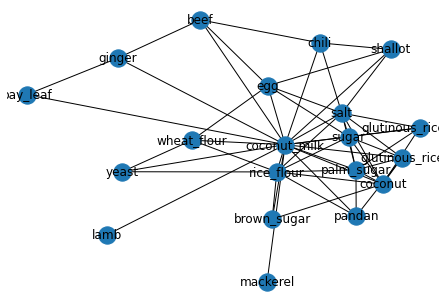

In [51]:
#Extract the subgraph with nodes of interest
T_draw = get_nodes_and_nbrs(G,['coconut_milk'])

#Draw the subgraph to the screen
nx.draw(T_draw, with_labels = True)
plt.show()

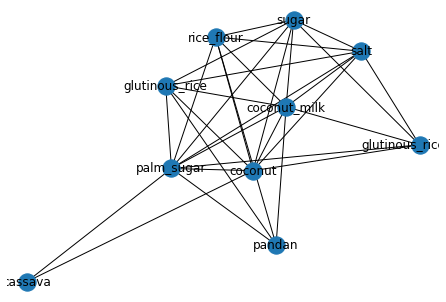

In [52]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(G, ['palm_sugar'])

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

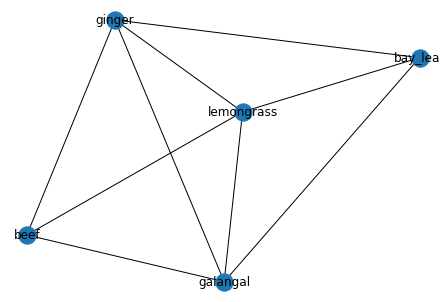

In [53]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(G, ['lemongrass'])

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()